In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
!pip install kagglehub
import kagglehub


In [4]:
from kagglehub import dataset_download

path = dataset_download("vipoooool/new-plant-diseases-dataset")
print("Downloaded dataset to:", path)


Downloaded dataset to: /kaggle/input/new-plant-diseases-dataset


In [5]:
import os

# List the contents of the augmented dataset directory to check for correct subdirectories
augmented_dataset_path = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)'
print(os.listdir(augmented_dataset_path))

['New Plant Diseases Dataset(Augmented)']


In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir  = '/kaggle/input/new-plant-diseases-dataset/test'

# Create ImageDataGenerators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load and preprocess image data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multiclass classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


#DATA EXPLORATION

# In this project
We examine tree leaves of apple, grapes, blueberry, corn orange,peach,pepper,potato,tomato,soyabean,rasberry, strawberry.

In [8]:
import os

# Path to our training data
train_path = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# Get all folder names = class names
class_names = os.listdir(train_path)
class_names.sort()  # Sort alphabetically

# Total number of classes
print("🌿 Total unique plant classes (healthy + diseased):", len(class_names))

# Show first 10 disease types with explanation
print("\n Example Disease/Health Categories:\n")
for cname in class_names:  # Just first 10
    plant, disease = cname.split("___")
    if disease.lower() == "healthy":
        print(f"✅ {plant} — Healthy (no disease)")
    else:
        print(f"⚠️ {plant} — has disease: {disease.replace('_', ' ')}")


#we print here all of our class labels.


🌿 Total unique plant classes (healthy + diseased): 38

 Example Disease/Health Categories:

⚠️ Apple — has disease: Apple scab
⚠️ Apple — has disease: Black rot
⚠️ Apple — has disease: Cedar apple rust
✅ Apple — Healthy (no disease)
✅ Blueberry — Healthy (no disease)
⚠️ Cherry_(including_sour) — has disease: Powdery mildew
✅ Cherry_(including_sour) — Healthy (no disease)
⚠️ Corn_(maize) — has disease: Cercospora leaf spot Gray leaf spot
⚠️ Corn_(maize) — has disease: Common rust 
⚠️ Corn_(maize) — has disease: Northern Leaf Blight
✅ Corn_(maize) — Healthy (no disease)
⚠️ Grape — has disease: Black rot
⚠️ Grape — has disease: Esca (Black Measles)
⚠️ Grape — has disease: Leaf blight (Isariopsis Leaf Spot)
✅ Grape — Healthy (no disease)
⚠️ Orange — has disease: Haunglongbing (Citrus greening)
⚠️ Peach — has disease: Bacterial spot
✅ Peach — Healthy (no disease)
⚠️ Pepper,_bell — has disease: Bacterial spot
✅ Pepper,_bell — Healthy (no disease)
⚠️ Potato — has disease: Early blight
⚠️ Pota

#Checking if the dataset is imbalanced, since imbalanced dataset lead to biases and biased results

Soybean___healthy                   : 2022 images
Apple___Apple_scab                  : 2016 images
Orange___Haunglongbing_(Citrus_greening) : 2010 images
Apple___healthy                     : 2008 images
Pepper,_bell___healthy              : 1988 images
Apple___Black_rot                   : 1987 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus : 1961 images
Potato___Late_blight                : 1939 images
Potato___Early_blight               : 1939 images
Tomato___healthy                    : 1926 images
Tomato___Early_blight               : 1920 images
Grape___Esca_(Black_Measles)        : 1920 images
Pepper,_bell___Bacterial_spot       : 1913 images
Corn_(maize)___Northern_Leaf_Blight : 1908 images
Corn_(maize)___Common_rust_         : 1907 images
Grape___Black_rot                   : 1888 images
Tomato___Leaf_Mold                  : 1882 images
Corn_(maize)___healthy              : 1859 images
Tomato___Late_blight                : 1851 images
Peach___Bacterial_spot              : 1838

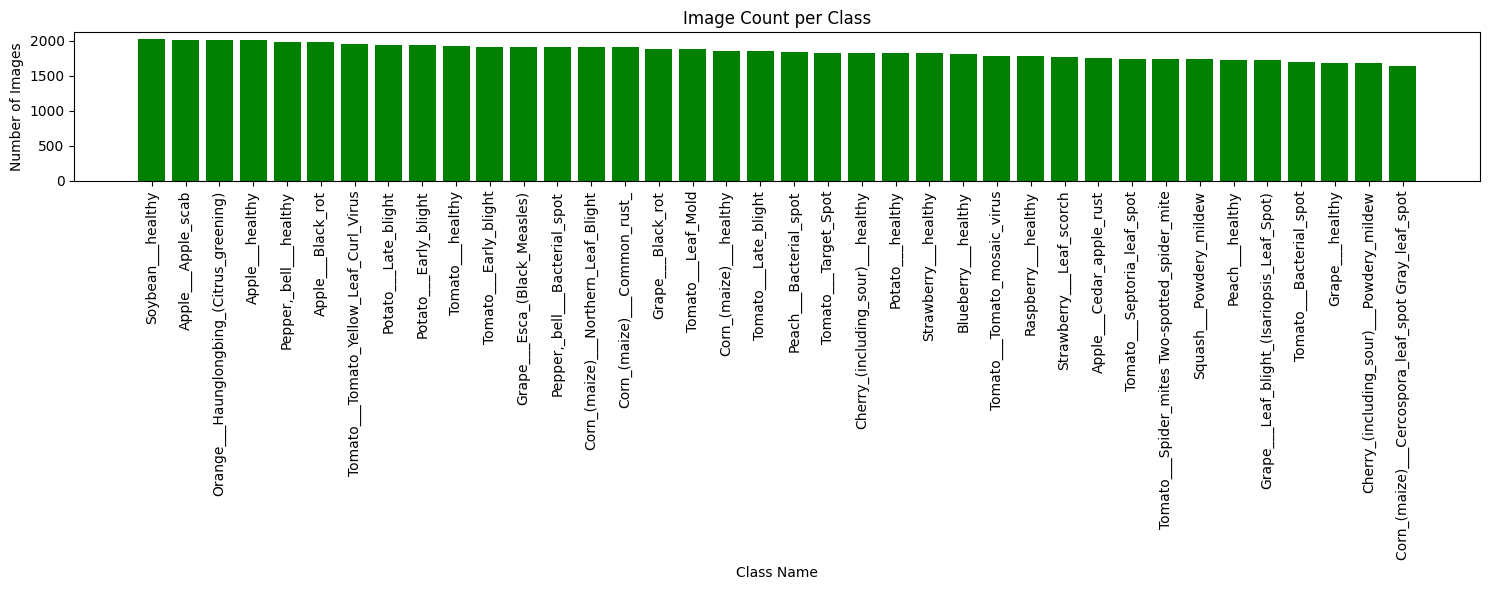

In [9]:
import os
from collections import Counter

# Set your training directory path
train_path = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# Get list of class folders
class_counts = {}

# Count number of images in each class folder
for class_folder in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_folder)
    if os.path.isdir(class_dir):
        image_count = len(os.listdir(class_dir))
        class_counts[class_folder] = image_count

# Sort by image count (optional)
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Print class name and number of images
for cname, count in sorted_counts.items():
    print(f"{cname:35s} : {count} images")

# Optional: visualize with barplot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='green')
plt.xticks(rotation=90)
plt.title("Image Count per Class")
plt.ylabel("Number of Images")
plt.xlabel("Class Name")
plt.tight_layout()
plt.show()


Hence we see that the data seems to be balanced pretty well with less differences in images per class

#VISUALIZATION OF OUR LEAVES

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Base dataset path
base_path = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

# Function to show healthy vs diseased images for any plant.
def visualize_plant(plant_name, count=3):
    healthy_path = os.path.join(base_path, f"{plant_name}___healthy")
    disease_dirs = [d for d in os.listdir(base_path) if plant_name in d and "healthy" not in d]

    if not disease_dirs:
        print(f"No disease class found for {plant_name}")
        return

    disease_class = disease_dirs[0]
    disease_path = os.path.join(base_path, disease_class)

    def show_images(image_dir, title, count, start_index):
        images = os.listdir(image_dir)
        selected_images = random.sample(images, count)
        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(image_dir, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(1, count * 2, start_index + i)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{title} {i+1}")

    plt.figure(figsize=(15, 5))
    show_images(healthy_path, f"{plant_name}\nHealthy", count, 1)
    show_images(disease_path, disease_class.replace("___", "\n"), count, count + 1)
    plt.suptitle(f"{plant_name} - Healthy vs Diseased Samples", fontsize=16)
    plt.tight_layout()
    plt.show()


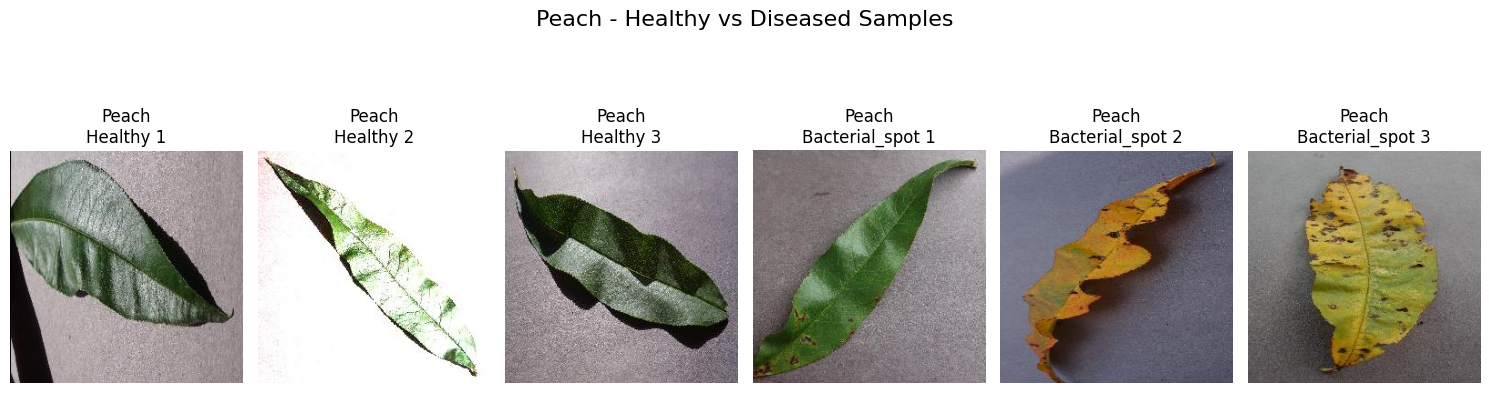

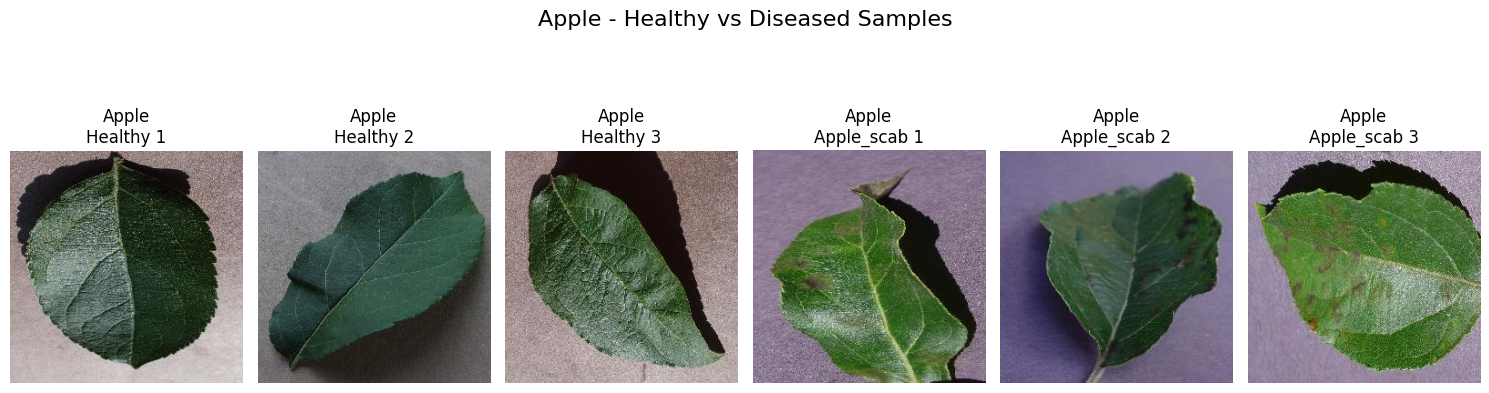

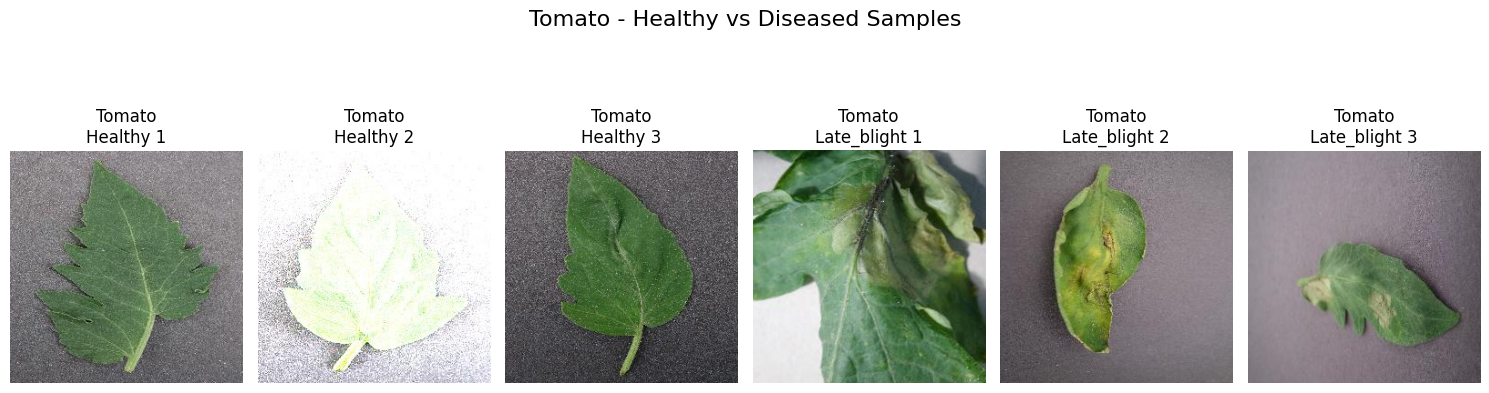

In [11]:
visualize_plant("Peach")
visualize_plant("Apple")
visualize_plant("Tomato")


#We intend to compare the rgb values for healthy vs diseased for classes to hwlp us understand a few things:


*   You visually confirm if color is a major feature for classification. If yes, it tells you that simple models (even color-based) may do well.
*   List item



In [12]:
def plot_avg_rgb_histograms_for_class(plant_name, count=10):
    healthy_path = os.path.join(base_path, f"{plant_name}___healthy")
    disease_dirs = [d for d in os.listdir(base_path) if plant_name in d and "healthy" not in d]

    if not disease_dirs:
        print(f"No disease class found for {plant_name}")
        return

    disease_path = os.path.join(base_path, disease_dirs[0])

    def avg_histogram(image_dir, count):
        images = random.sample(os.listdir(image_dir), count)
        total_hist = np.zeros((3, 256))

        for img_name in images:
            img_path = os.path.join(image_dir, img_name)
            img = mpimg.imread(img_path)

            for i in range(3):  # RGB
                hist, _ = np.histogram(img[:, :, i].flatten(), bins=256, range=(0, 256))
                total_hist[i] += hist

        avg_hist = total_hist / count
        return avg_hist

    # Compute average histograms
    healthy_hist = avg_histogram(healthy_path, count)
    disease_hist = avg_histogram(disease_path, count)

    # Plotting
    plt.figure(figsize=(14, 5))

    for idx, (hist, title) in enumerate(zip([healthy_hist, disease_hist], [f"{plant_name} - Healthy", f"{plant_name} - {disease_dirs[0].replace('___', ' ')}"])):
        plt.subplot(1, 2, idx + 1)
        for i, color in enumerate(('r', 'g', 'b')):
            plt.plot(hist[i], color=color)
            max_val = np.max(hist[i])
            max_index = np.argmax(hist[i])
            plt.annotate(f'{int(max_val)}', xy=(max_index, max_val), xytext=(max_index, max_val + 50),
                         color=color, fontsize=8, ha='center', arrowprops=dict(arrowstyle='->', color=color))
        plt.title(title)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Average Count")
        plt.xlim([0, 256])

    plt.suptitle(f"Average RGB Histogram for {plant_name} - Healthy vs Diseased", fontsize=16)
    plt.tight_layout()
    plt.show()


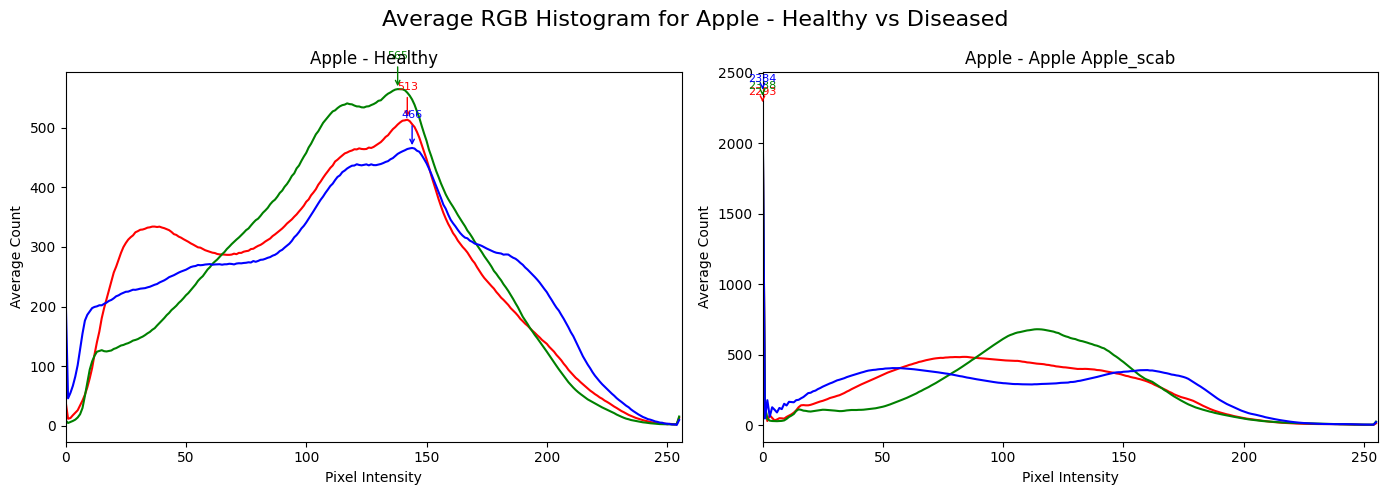

In [13]:
plot_avg_rgb_histograms_for_class('Apple', count=2000)


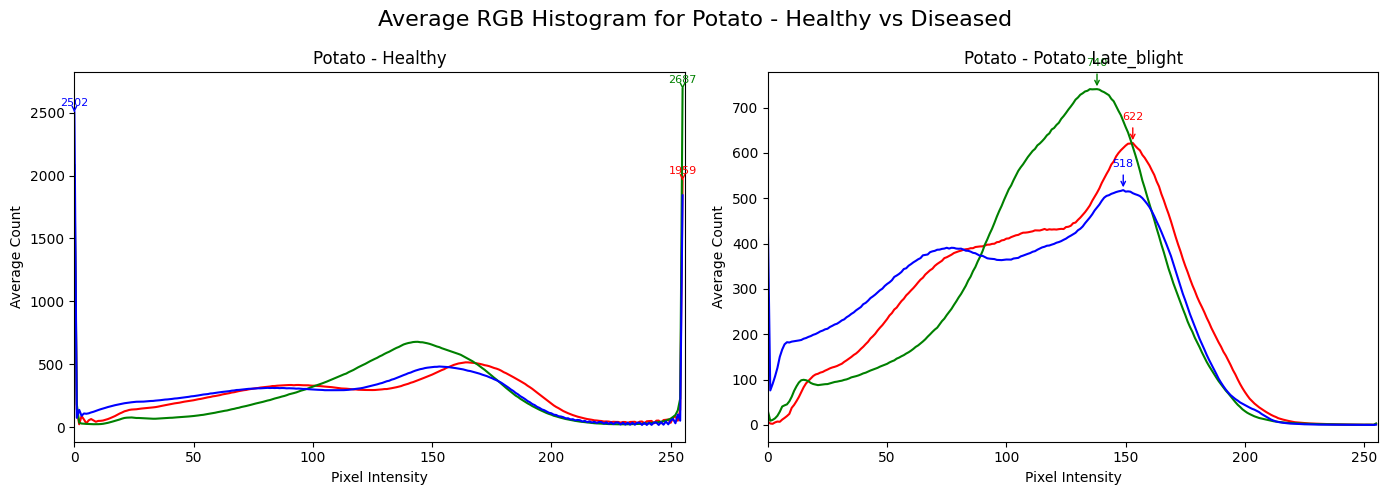

In [14]:
plot_avg_rgb_histograms_for_class('Potato', count=1700)


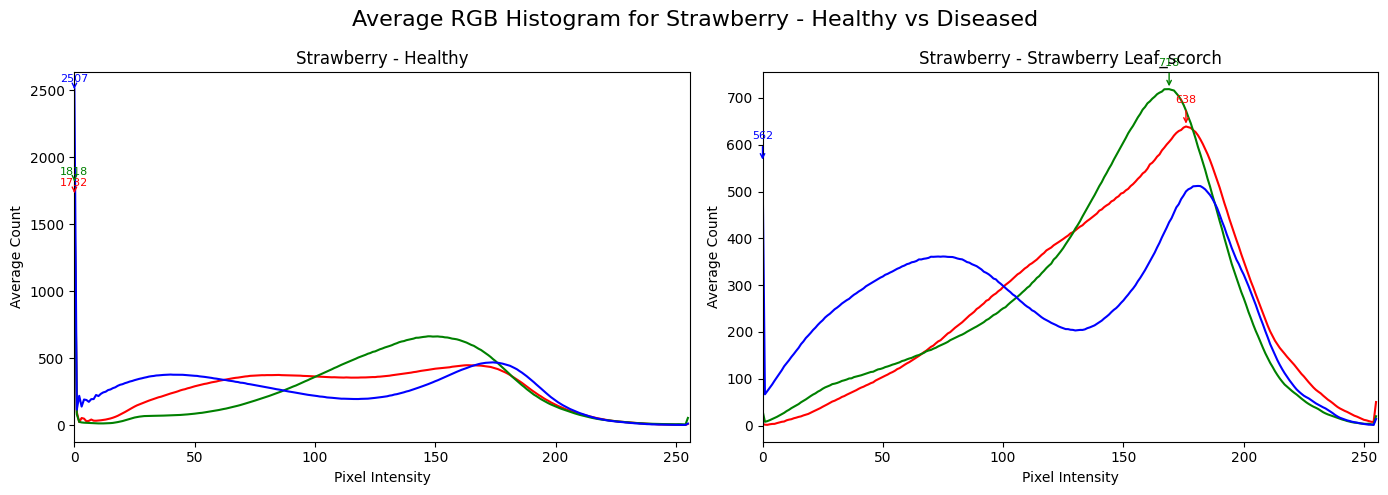

In [15]:
plot_avg_rgb_histograms_for_class('Strawberry', count=1700)


#INFERENCES


*   Healthy leaves generally show balanced, mid-range RGB peaks, while diseased ones (like scab or blight) show shifts to lower intensities, indicating darker patches and lesion areas.
*   These pixel intensity differences confirm that color is a strong signal for classification

#model thinking

1.   Since visual differences are evident, train a CNN on RGB images directly (e.g., using EfficientNet, ResNet) — no grayscale conversion.






These patterns can be useful for:

Training ML models — RGB histogram patterns can be used as features.

Feature extraction — color skewness or mean shift from healthy baseline.

#BUILDING OUR MODEL
USING CNN PEHLE

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 594s 334ms/step - accuracy: 0.3157 - loss: 2.4554 - val_accuracy: 0.7506 - val_loss: 0.8253
Epoch 2/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 348s 198ms/step - accuracy: 0.7098 - loss: 0.9317 - val_accuracy: 0.8506 - val_loss: 0.4846
Epoch 3/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 347s 197ms/step - accuracy: 0.7921 - loss: 0.6593 - val_accuracy: 0.8793 - val_loss: 0.3715
Epoch 4/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 348s 198ms/step - accuracy: 0.8282 - loss: 0.5361 - val_accuracy: 0.8876 - val_loss: 0.3524
Epoch 5/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 339s 193ms/step - accuracy: 0.8551 - loss: 0.4541 - val_accuracy: 0.8931 - val_loss: 0.3371
Epoch 6/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 355s 202ms/step - accuracy: 0.8761 - loss: 0.3863 - val_accuracy: 0.9252 - val_loss: 0.2300
Epoch 7/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 343s 195ms/step - accuracy: 0.8907 - loss: 0.3422 - val_accuracy: 0.9122 - val_loss: 0.2705
Epoch 8/10
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 343s 195ms/step - ac

439/439 ━━━━━━━━━━━━━━━━━━━━ 65s 148ms/step
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.92      0.92       403
                                 Apple___Black_rot       0.97      0.97      0.97       397
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       352
                                   Apple___healthy       0.94      0.83      0.88       401
                               Blueberry___healthy       0.97      0.86      0.91       363
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       336
                 Cherry_(including_sour)___healthy       0.92      0.98      0.94       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.91      0.90       328
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       381
            

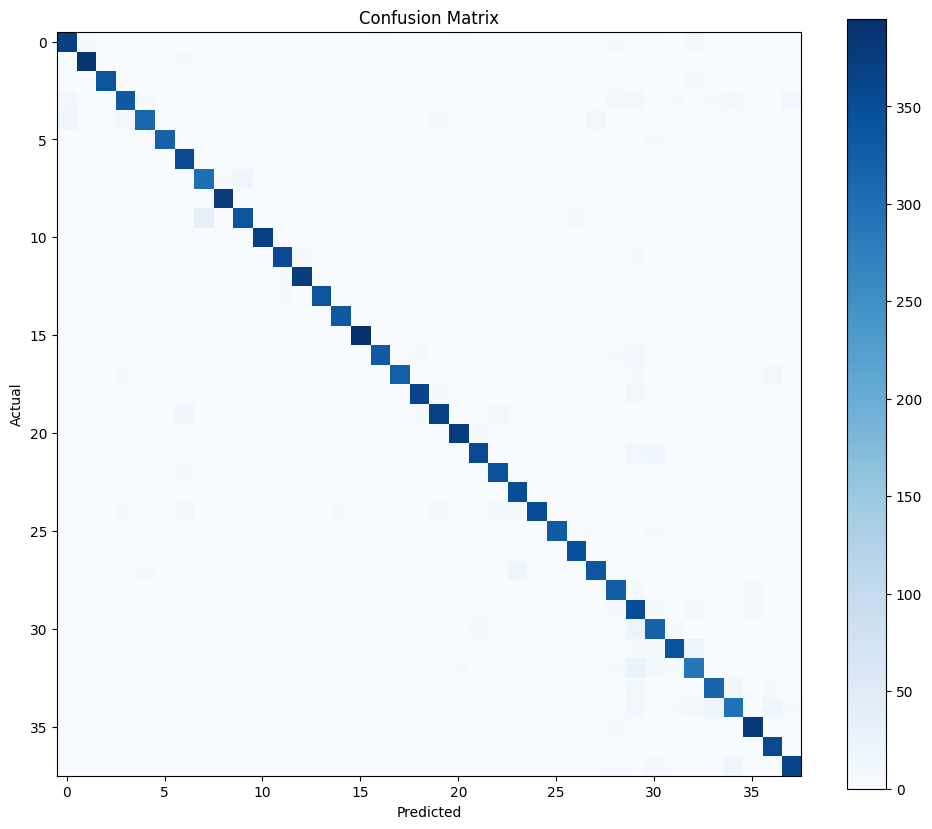

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
img_size = (128, 128)
batch_size = 32
epochs = 15

# --- Corrected Dataset Path ---
dataset_path = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# --- Data Generators ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for confusion matrix
)

# --- Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Training ---
history = model.fit(train_data, validation_data=val_data, epochs=10)

# --- Save Model ---
model.save("plant_disease_cnn_model.h5")

# --- Evaluate on Validation Set ---
val_preds = model.predict(val_data)
val_pred_labels = np.argmax(val_preds, axis=1)
true_labels = val_data.classes

# --- Classification Report ---
print("Classification Report:")
print(classification_report(true_labels, val_pred_labels, target_names=list(val_data.class_indices.keys())))

# --- Confusion Matrix ---
cm = confusion_matrix(true_labels, val_pred_labels)
plt.figure(figsize=(12, 10))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalizes pixel values (0–255 ➝ 0–1), essential for deep learning
    validation_split=0.2,         # Reserves 20% of data for validation
    rotation_range=20,            # Randomly rotate images within 20 degrees ➝ simulates real-world tilt
    width_shift_range=0.2,        # Horizontally shifts image by up to 20% ➝ handles misaligned captures
    height_shift_range=0.2,       # Vertically shifts image by up to 20% ➝ similar to above
    shear_range=0.1,              # Applies shearing transformation ➝ mimics distortion (like scanning)
    zoom_range=0.2,               # Zooms in/out randomly by up to 20% ➝ makes model scale-invariant
    horizontal_flip=True,         # Flips images left-right randomly ➝ handles symmetric leaf patterns
    fill_mode='nearest'           # Fills missing pixels after shift/rotation using nearest neighbors
)

In [18]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


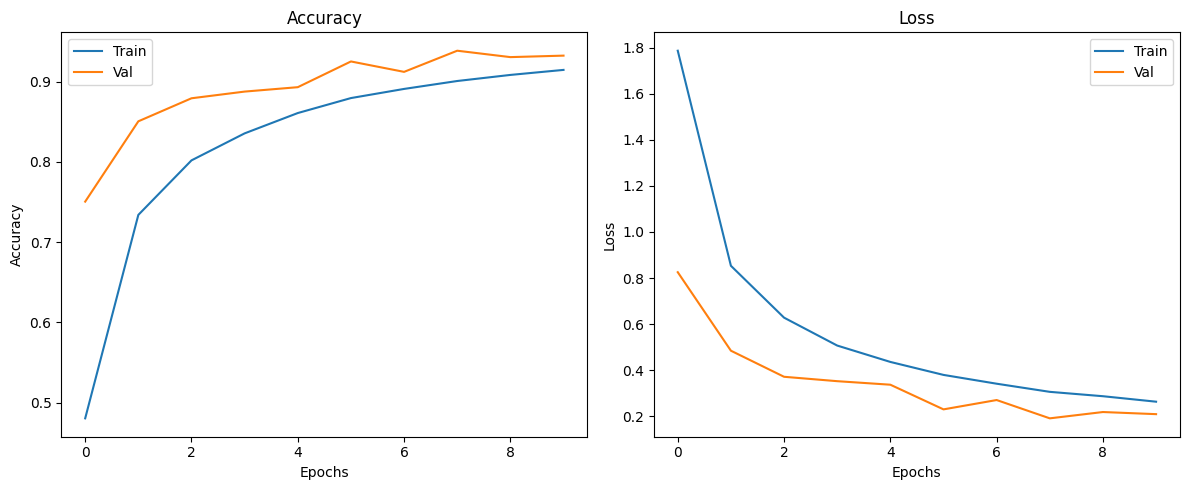

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.02      0.03       403
                                 Apple___Black_rot       0.11      0.02      0.04       397
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       352
                                   Apple___healthy       0.00      0.00      0.00       401
                               Blueberry___healthy       0.01      0.00      0.00       363
          Cherry_(including_sour)___Powdery_mildew       0.12      0.01      0.01       336
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       328
                       Corn_(maize)___Common_rust_       0.03      0.10      0.05       381
            

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


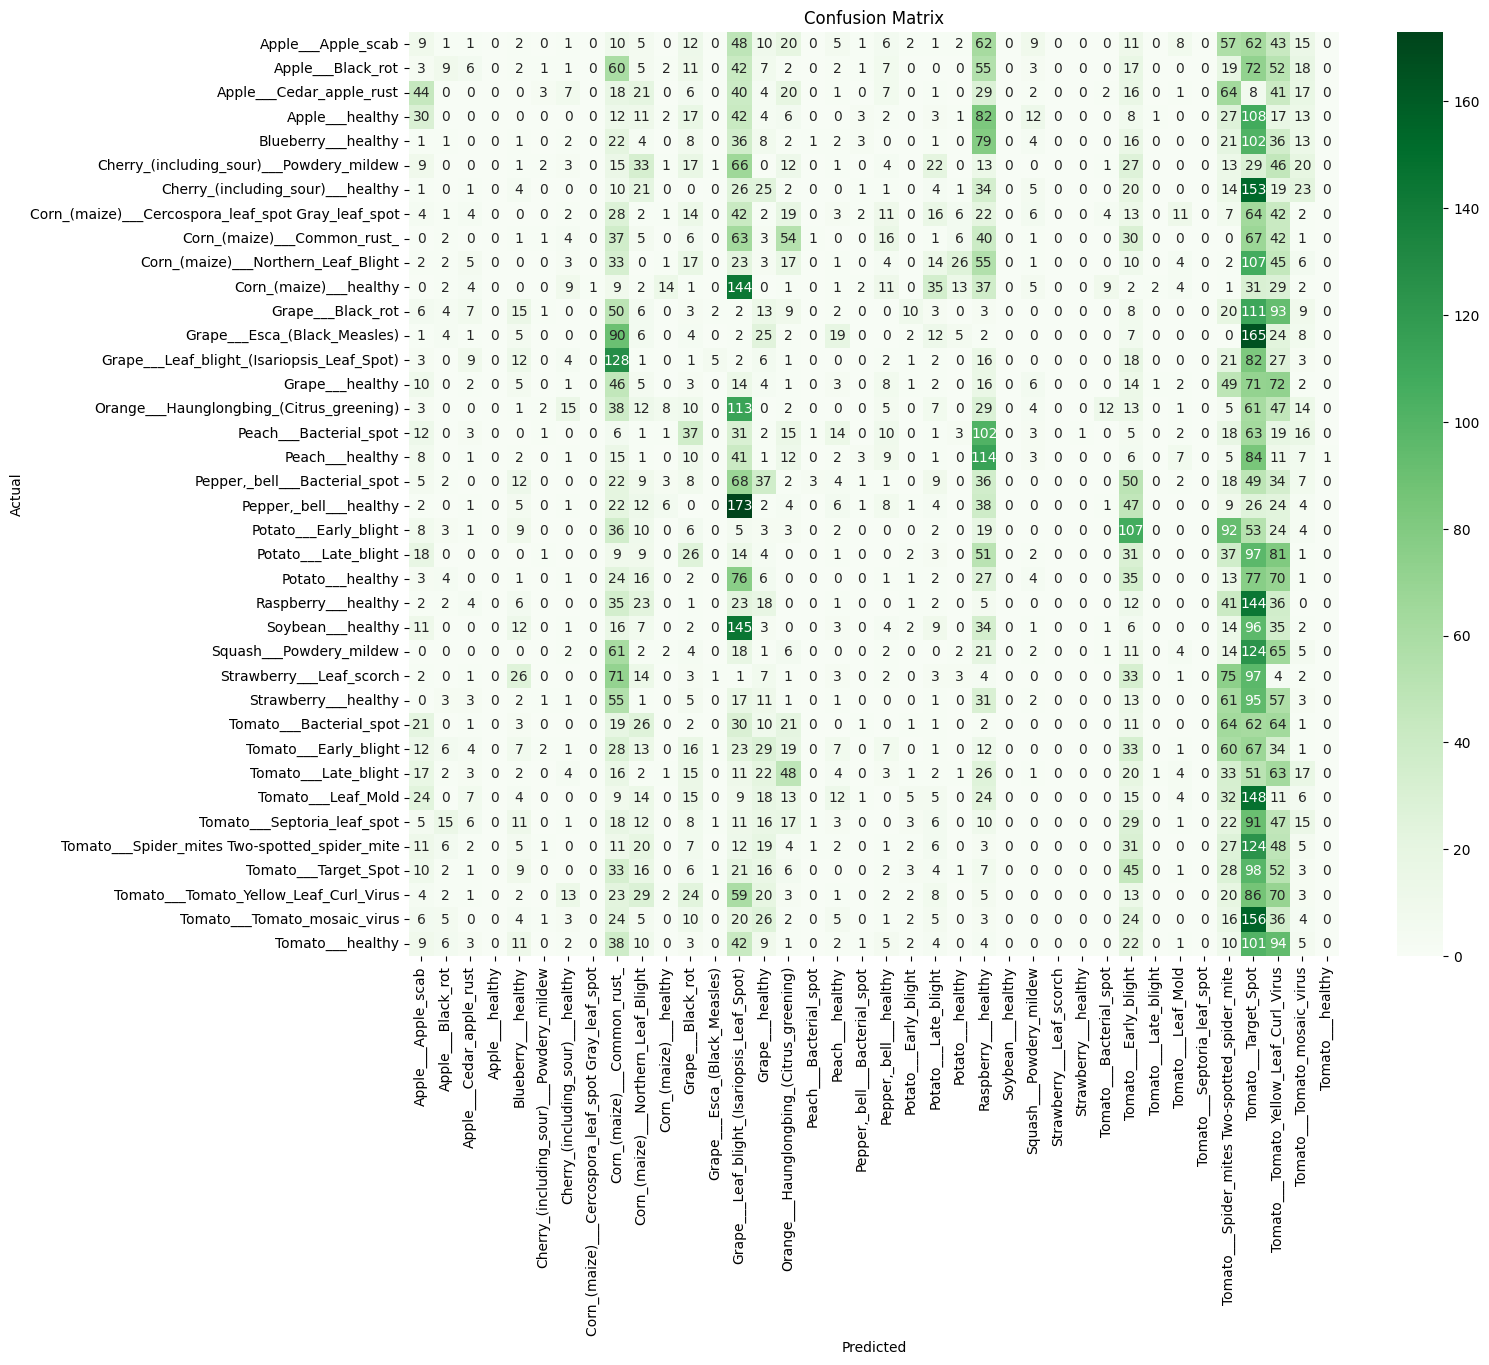

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd

# Predict
val_preds = model.predict(val_data)
val_pred_labels = np.argmax(val_preds, axis=1)
true_labels = val_data.classes
labels = list(val_data.class_indices.keys())

# Report
print("Classification Report:")
print(classification_report(true_labels, val_pred_labels, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, val_pred_labels)
plt.figure(figsize=(15,12))
sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()